In [232]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [548]:
def normalize(X):
    X[0] -= X[0].mean();#X[0] /= X[0].var()
    X[1] -= X[1].mean();X[1] /= X[1].var()
    return X

2.138294411392473
7.27662491491088 3.40300422436791


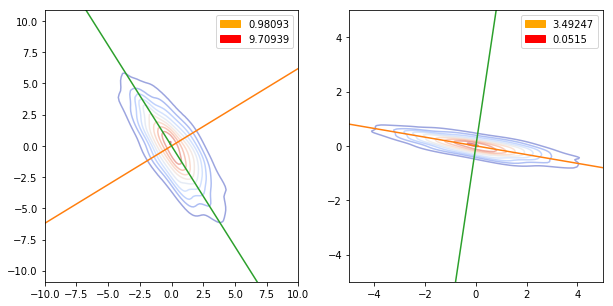

In [561]:
X = np.random.normal(loc=[0, 0], scale=[1, 3], size=(1000, 2)).T

theta = np.radians(30)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

X = R @ X

print(X[1].var() / X[0].var())
print(X[1].var(), X[0].var())

arrow_len_multiplier = 0.5
head_width = 1

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(121)

cov = np.cov(X)
eigvals, eigvecs = np.linalg.eig(cov)

sns.kdeplot(X[0], X[1], alpha=0.5, cmap='coolwarm')
plt.plot([-10, 10], [-10 * eigvecs[:,0][1] / eigvecs[:,0][0], 10 * eigvecs[:,0][1] / eigvecs[:,0][0]])
plt.plot([-10, 10], [-10 * eigvecs[:,1][1] / eigvecs[:,1][0], 10 * eigvecs[:,1][1] / eigvecs[:,1][0]])

plt.xlim(-10, 10); plt.ylim(-np.var(X[1]) * np.sqrt(2.2374593539964893), np.var(X[1]) * np.sqrt(2.2374593539964893))

# arr1 = plt.arrow(
#     0, 
#     0, 
#     eigvecs[:,0][0] * arrow_len_multiplier * eigvals[0], 
#     eigvecs[:,0][1] * arrow_len_multiplier * eigvals[0], 
#     head_width=head_width, 
#     color='orange'
# )


# arr2 = plt.arrow(
#     0, 
#     0, 
#     eigvecs[:,1][0] * arrow_len_multiplier * eigvals[1], 
#     eigvecs[:,1][1] * arrow_len_multiplier * eigvals[1], 
#     head_width=head_width, 
#     color='red'
# )

plt.legend([arr1, arr2], [round(eigvals[0], 5), round(eigvals[1], 5)])

fig.add_subplot(122)

arrow_len_multiplier = 1.5
head_width = 0.3

X = normalize(X)
cov = np.cov(X)
eigvals, eigvecs = np.linalg.eig(cov)

sns.kdeplot(X[0], X[1], alpha=0.5, cmap='coolwarm')
 #plt.ylim(-10, 10)

plt.plot([-10, 10], [-10 * eigvecs[:,0][1] / eigvecs[:,0][0], 10 * eigvecs[:,0][1] / eigvecs[:,0][0]])
plt.plot([-10, 10], [-10 * eigvecs[:,1][1] / eigvecs[:,1][0], 10 * eigvecs[:,1][1] / eigvecs[:,1][0]])


plt.xlim(-10, 10); #plt.ylim(-1.5, 1.5)
plt.xlim(-5, 5); plt.ylim(-5, 5)

plt.legend([arr1, arr2], [round(eigvals[0], 5), round(eigvals[1], 5)])

plt.show()

(0, 30)

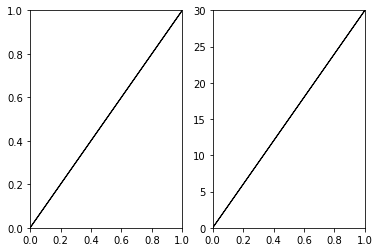

In [507]:
fig = plt.figure()

fig.add_subplot(121)
plt.arrow(0, 0, 1, 1)

fig.add_subplot(122)
plt.arrow(0, 0, 1, 30)
plt.xlim(0, 1); plt.ylim(0, 30)

In [430]:
X_remain = X - (eigvecs[:,1].reshape(2, 1).T @ X) * np.tile(eigvecs[:,1].reshape(2, 1), (1, 1000))

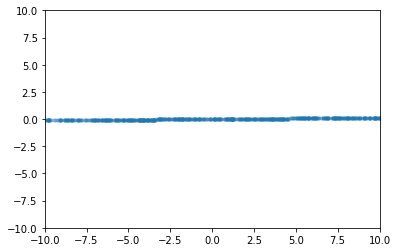

In [358]:
plt.scatter(X_remain[0], X_remain[1], alpha=0.3, s=10)
plt.xlim(-10, 10); plt.ylim(-10, 10)
plt.show()

In [132]:
np.linalg.eig(np.cov(X_remain))

(array([3.90821855e+00, 3.33066907e-16]), array([[ 0.86636395, -0.49941317],
        [ 0.49941317,  0.86636395]]))

I want to show that the largest eigenvalue of this new covariance matrix is now set to zero, while other eigenvalues are unchanged. 